### Programm #6. HashTable  



Written by: Kovalev Alexander  
Department:  MSU, Physics Faculty, Mathematical Modelling and Computer Sciencegr(MMCS), gr. 435    
  
  
Task: Compare perfomance hash functions

Implement two frequency dictionary on different hash functions
- FNV64
- microsoft with shift mfc

Compare their performance, plotted follow graph:
- x axis: load factor
- y axis: number of collisions

In [1]:
import re
import string
import matplotlib.pyplot as plt
import numpy as np
import random 
import seaborn as sns; sns.set()

In [2]:
import seaborn as sns; sns.set()

In [3]:
class Node():
    """key and value and forward
    linked list"""
    def __init__(self, key=None):
        self.forward = None
        self.key = key
        self.value = 1
        
    
    def add(self, other_node, collision = 0):
        """Output: number collisions for incerting new word
        1 --
        """
        if self.key and self.key != other_node.key:
            collision +=1
            if self.forward is None:
                self.forward = other_node 
            else:
                collision = self.forward.add(other_node, collision)
        elif self.key == other_node.key:
            self.value += 1
        else:
            self.key = other_node.key
        return collision
        
    def lenght_chain(self):
        """if None is key than output is 0"""
        if self.key is None:
            return 0
        lenght = 1
        next_item = self.forward
        while next_item:
            lenght +=1
            next_item = next_item.forward 
        return lenght

    def show_list(self):
        print(self.key, self.value)
        if self.forward:
            self.forward.show_list()
        

In [4]:
n1 = Node('j')
n2 = Node('ki')
n3 = Node('ki')
n4 = Node('kir')
n5 = Node('hbur')
n6 = Node('msu')

In [5]:
col = n1.add(Node('cad'))
n1.show_list()

col

j 1
cad 1


1

In [6]:
#Test my own ideas

In [7]:
def A():
    print('1')
def B(name):
    print(name)

In [8]:
mas = [A, B]
# I can make list of functions

#### Реализация словаря на разных  хеш_функциях


In [9]:
import numpy as np


In [10]:
def microsoft_hash(string):
    hash_num = 8039
    for char in string[1:]: #here may be string[1:]
        hash_num = (hash_num << 5) + hash_num + ord(char)
    return hash_num 

def fnv_64(string):
    #FNV_prime = 1099511628211   # for 64 bit FNV
    FNV_prime = 8039
    hash_num = 14695981039346656037 # offst for 64 bit FNV
    for char in string[1:]:
        hash_num = hash_num * FNV_prime
        hash_num = hash_num ^ ord(char)    # xor ~ ^
    return hash_num

In [11]:
mas_hash_func = [microsoft_hash, fnv_64]

# def my_hash(string):
#     hash_num = 8039
#     for char in string[1:]:
#         hash_num += ord(char)    # xor ~ ^
#     return hash_num

In [12]:
class HashTable:
    def __init__(self, size, hash_name):
        self.hash_name = hash_name
        self.size = size
        self.array = [Node() for i in range(self.size)]
        self.lenghts_chain = [0]*self.size
        #self.num_collisions = 0
        self.unique_words = 0
        self.num_empty_item = size

    def put(self,key):
        hashvalue = self.hashfunction(key,len(self.array))
        tmp_node = Node(key)
        
        len_before = self.array[hashvalue].lenght_chain()
        num_collisions = self.array[hashvalue].add(tmp_node)
        self.lenghts_chain[hashvalue] = self.array[hashvalue].lenght_chain() 
        
#         if len_before != 0:
#             self.num_collisions += self.lenghts_chain[hashvalue] - len_before
#         else:
#             self.num_empty_item -= 1 
        
        self.unique_words += self.lenghts_chain[hashvalue] - len_before
        
        #we save lenghts of chains. aka number of collisions
        return num_collisions
        
        
    def set_unique_word(self, num):
        self.unique_words = num
    
    def get_num_empty_slot(self):
        return self.num_empty_item
    def get_new_collisions(self):
        return self.num_collisions
    def get_new_unique_words(self):
        return self.unique_words
    
    
    def get_collisions(self):
        num_collisions = 0
        
        for lenght in self.lenghts_chain:
            if lenght == 0:
                continue
            num_tmp = lenght-1
            num_collisions += num_tmp
        return num_collisions
    
    def get_load_factor(self):
        size = 0
        for lenght in self.lenghts_chain:
            size += lenght
        return size/self.size
    
    def get_loading_hash(self):
        size = 0
        for i in range(self.size):
            if self.lenghts_chain[i] == 0:
                size += 1
        return size/self.size
    
    def hashfunction(self, key, size):
        if self.hash_name == "fnv64":
            return fnv_64(key) &  (self.size-1)
        
        elif self.hash_name == 'microsoft':
            return (microsoft_hash(key)>>5) &  (self.size-1)
        
        elif self.hash_name == 'mode':
            return key%size
        elif self.hash_name =='myhash':
            return my_hash(key) &  ((self.size-1)<<5)
        else:
            print('I do not know this hash')






In [13]:
kant_file = open("Kritika.txt", "r")
data = kant_file.read() # len = 25507
kant_file.close()

def clean_txt(input_str):
    input_to_lower = input_str.lower() 
    input_no_digit = re.sub(r'\d+', '', input_to_lower) # without digits
    clean_input = input_no_digit.translate(str.maketrans("","", string.punctuation)) # clean punctuations
    return clean_input.split()

clean_data = clean_txt(data)
print("Количество слов {},\nКоличество символов {} \nКоличество уникальных слов {}".format(len(clean_data),len(data), len(set(clean_data))))

Количество слов 59822,
Количество символов 429317 
Количество уникальных слов 8037


In [14]:
size_text = len(set(clean_data)) # 8037
PRIME_unique = 8039


#### FNV64 hash

In [15]:
htable_fnv = HashTable(PRIME_unique, 'fnv64')
htable_microsoft = HashTable(PRIME_unique, 'microsoft')
htable_myhash = HashTable(PRIME_unique, 'myhash')

In [16]:
def evaluation_hash_table(htable):
    htable.set_unique_word(0)
    collisions = [0] * len(clean_data)
    load_factors = [0] * len(clean_data)
    #loading_hash = [0] * len(clean_data)
    i = 0
    for word in clean_data:
        collisions[i] = htable.put(word)
        #collisions[i] = htable.get_new_collisions()
        load_factors[i] = htable.get_new_unique_words()/PRIME_unique
        #loading_hash[i] = (PRIME_unique - htable.get_num_empty_slot())/PRIME_unique
        i += 1
    return collisions, load_factors


In [17]:
collisions_fnv, load_factors_fnv = evaluation_hash_table(htable_fnv)
print('FNV completed')
collisions_microsoft, load_factors_microsoft = evaluation_hash_table(htable_microsoft)
print('Microsoft completed')
# collisions_myhash, load_factors_myhash = evaluation_hash_table(htable_myhash)
# print('Myhash completed')

FNV completed
Microsoft completed


In [18]:
def exp_move_average(data, alpha=0.5):
    N = len(data)
    mas_out = np.zeros(N)
    for  i in range(1,N):
        mas_out[i] = alpha*data[i] + (1-alpha)*mas_out[i-1]                     
    return mas_out


In [30]:
# Moving average
N = 1000
collisions_fnv_mean = np.convolve(collisions_fnv, np.ones((N,))/N, mode='same')
#load_factors_fnv_mean = np.convolve(load_factors_fnv, np.ones((N,))/N, mode='valid')

collisions_microsoft_mean = np.convolve(collisions_microsoft, np.ones((N,))/N, mode='same')
#load_factors_microsoft_mean = np.convolve(load_factors_microsoft, np.ones((N,))/N, mode='valid')

In [36]:
# Moving exponential average
alpha = 0.0005
collisions_fnv_emwa = exp_move_average(collisions_fnv,alpha)
collisions_microsoft_emwa = exp_move_average(collisions_microsoft, alpha)


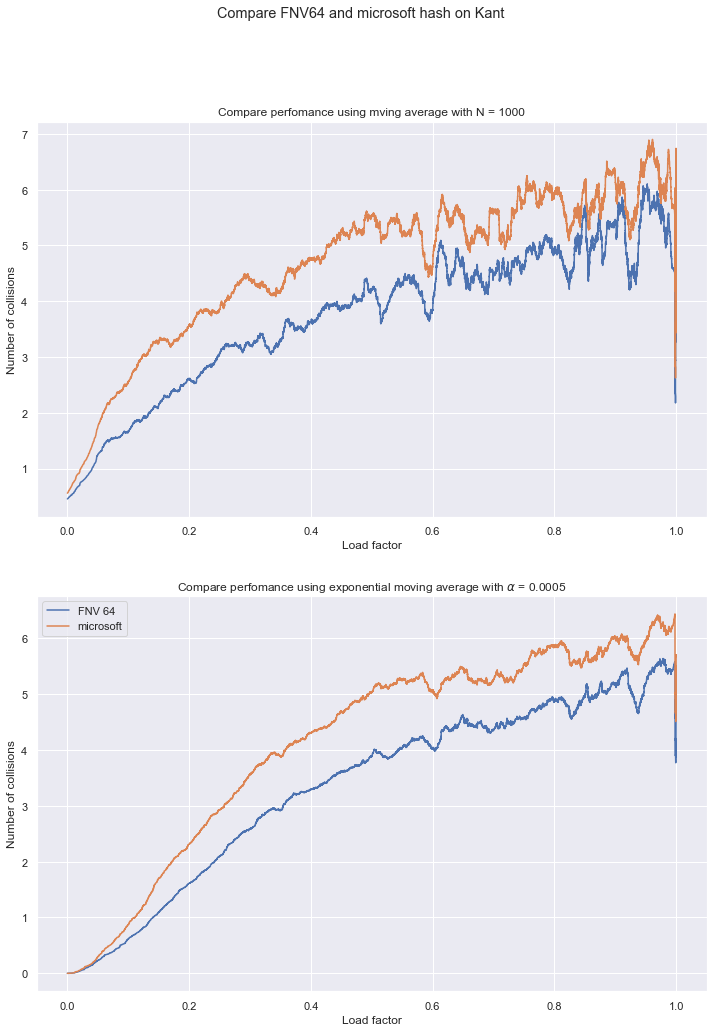

In [37]:

fig, ax = plt.subplots(2,1, figsize = (12,16))

fig.suptitle("Compare FNV64 and microsoft hash on Kant")
for axi in ax.flat:
    axi.set(xlabel = "Load factor", ylabel = ("Number of collisions"))

ax[0].plot(load_factors_fnv, collisions_fnv_mean, label = 'FNV 64')
ax[0].plot(load_factors_microsoft, collisions_microsoft_mean, label = 'microsoft')
ax[0].set_title('Compare perfomance using mving average with N = ' + str(N))


ax[1].plot(load_factors_fnv, collisions_fnv_emwa, label = 'FNV 64')
ax[1].plot(load_factors_microsoft, collisions_microsoft_emwa, label = 'microsoft')
ax[1].set_title('Compare perfomance using exponential moving average with '+ r'$\alpha$'+' = ' +str(alpha))

plt.legend()

Look on lenght of chain in hash_table

In [22]:
def take_lenghts_chains(htable):
    mas = []
    for i in htable.lenghts_chain:
        mas.append(i)
    return mas


In [23]:
chains_fnv = take_lenghts_chains(htable_fnv)
chains_microsoft = take_lenghts_chains(htable_microsoft)
chains_microsoft
#chains_myhash = take_lenghts_chains(htable_myhash)

[16,
 0,
 39,
 0,
 34,
 0,
 23,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 16,
 0,
 10,
 0,
 7,
 0,
 14,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 15,
 0,
 14,
 0,
 17,
 0,
 18,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 10,
 0,
 48,
 0,
 30,
 0,
 17,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 

(0, 150)

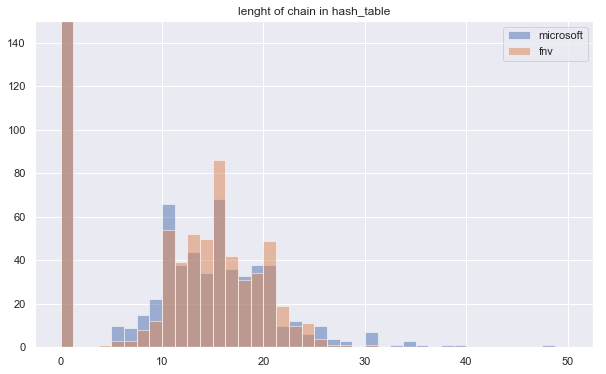

In [33]:
plt.figure(figsize = (10,6))
plt.title('lenght of chain in hash_table')
plt.hist(chains_microsoft,range =(0,50),bins = 40, alpha=0.5, label = 'microsoft')
plt.hist(chains_fnv,range =(0,50),bins = 40, alpha=0.5, label = 'fnv')


plt.legend()
plt.ylim(0,150)